In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd 


diabetes = load_diabetes(as_frame=True)
data = diabetes.frame

"""THIS DATASET IS ONLY FOR REGRESSION TASKS BUT FOR PRACTICE ONLY WE ARE APPLYING OTHER ALGORITHMS"""


In [2]:
data.shape

(442, 11)

In [3]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [4]:
data.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [5]:
data.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [8]:
print(data["target"].unique())

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144. 168.  68.  49. 245. 184. 202. 137.  85. 131. 283.
 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.  61.  92.
 259.  53. 190. 142. 155. 225. 104. 182. 128.  52.  37. 170.  71. 163.
 150. 160. 178.  48. 270. 111.  42. 200. 113. 143.  51. 210. 134.  98.
 164.  96. 162. 279.  83. 302. 198.  95. 232.  81. 246. 297. 258. 229.
 275. 281. 173. 180.  84. 121. 161.  99. 109. 115. 268. 274. 158. 107.
 103. 272. 280. 336. 317. 235.  60. 174. 126. 288.  88. 292. 197. 186.
  25. 195. 217. 172. 214.  70. 220. 152.  47.  74. 295. 127. 237.  64.
  79.  91. 116.  86. 122.  72.  39. 196. 222. 277.  77. 191.  73. 263.
 248. 296.  78.  93. 208. 108. 154. 124.  67. 257. 262. 177. 187. 125.
 215. 303. 243. 153. 346.  89.  50. 308. 145.  45. 264. 241.  66.  94.
 230. 181. 156. 233. 219.  80. 332.  31. 236. 253.  44. 114. 147. 242.
 249. 192. 244. 199. 306. 216. 139. 148.  54. 221. 311. 321.  58. 123.
 167. 

In [9]:
x=data.drop("target", axis=1)

y=data["target"]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.25, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

y_predict=model.predict(X_test)

mse=mean_squared_error(y_test,y_predict)

print("mean squared error:",mse)

mean squared error: 3284.8120848108083


In [11]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(X_train, y_train)

y_predict=model.predict(X_test)

mse_logis = mean_squared_error(y_test, y_predict)

print("mean squared error of the logistic regression", mse_logis)

mean squared error of the logistic regression 7918.762048192771


In [12]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()

model.fit(X_train,y_train)

y_predict = model.predict(X_test)

mse_decision = mean_squared_error(y_test,y_predict)

print("mean_squared_error of decison tree regressor", mse_decision)

mean_squared_error of decison tree regressor 6295.234939759036


In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth":[3,5,10, None],
    "min_samples_split":[2,5,10]
}

grid = GridSearchCV(DecisionTreeRegressor(),params,cv=5)

grid.fit(X_train,y_train)

print("best parameters", grid.best_params_)

best parameters {'max_depth': 3, 'min_samples_split': 10}


In [16]:
best_model=grid.best_estimator_

y_predict = best_model.predict(X_test)

mse_decision_grid = mean_squared_error(y_test, y_predict)

print(mse_decision_grid)

4042.1433683836767


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pca = PCA(n_components=10)
X_PCA=pca.fit_transform(X_scaled)



In [24]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.40242108 0.55165304 0.67224967 0.76779731 0.83401545 0.89428716
 0.94794372 0.99131192 0.99914393 1.        ]


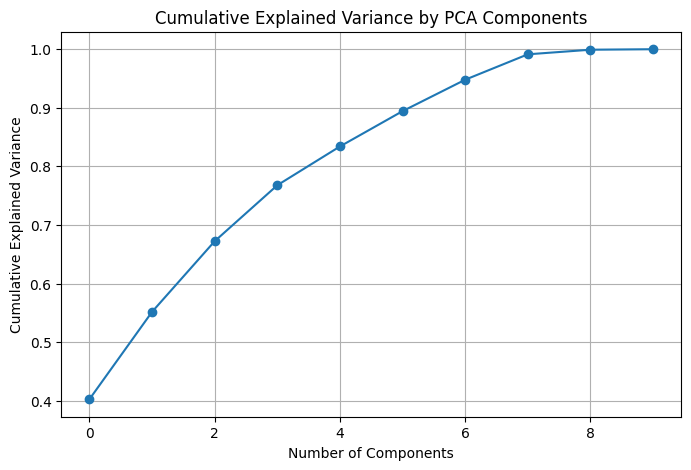

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [33]:
from sklearn.cluster import KMeans
"""if X_pca is not present then we need to use standard scalar and X_scaled insted of X_PCA"""
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
k_means = KMeans(n_clusters=3, random_state=42)
clusters = k_means.fit_predict(X_PCA)#usually we have to use fit_transform here but because the output shape will not be suitable for save thats why we are using fit_predict

In [34]:
data["Clusters"]=clusters


In [35]:
data["Clusters"]

0      2
1      0
2      2
3      2
4      0
      ..
437    2
438    1
439    2
440    2
441    0
Name: Clusters, Length: 442, dtype: int32

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel="linear")

model.fit(X_train,y_train)

print(model.score(X_test,y_test))"""because it is a classification algorithm"""

0.009036144578313253


In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.0030120481927710845


In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

print(model.score(X_test,y_test))

0.0


In [44]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),
    ("classifier", RandomForestClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)
print("\nPipeline Final Accuracy:", accuracy_score(y_test, y_pred_pipe))


Pipeline Final Accuracy: 0.0030120481927710845
